In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from project import get_binned_train_test_split

In [6]:
data = pd.read_csv('Numerical_train.csv')

In [7]:
X_train, X_test, y_train, y_test = get_binned_train_test_split(data)

In [2]:
# Decision tree best params
best_params = {'max_depth': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 500}

In [15]:
rf = RandomForestClassifier(**best_params)

In [16]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
rf.score(X_train, y_train)

0.9853085210577864

In [18]:
rf.score(X_test, y_test)

0.8561643835616438

In [20]:
feature_importances = sorted(zip(X_train.columns, rf.feature_importances_), reverse=True, key=lambda x: x[1])

In [22]:
feature_df = pd.DataFrame(feature_importances, columns=['feature', 'importance'])

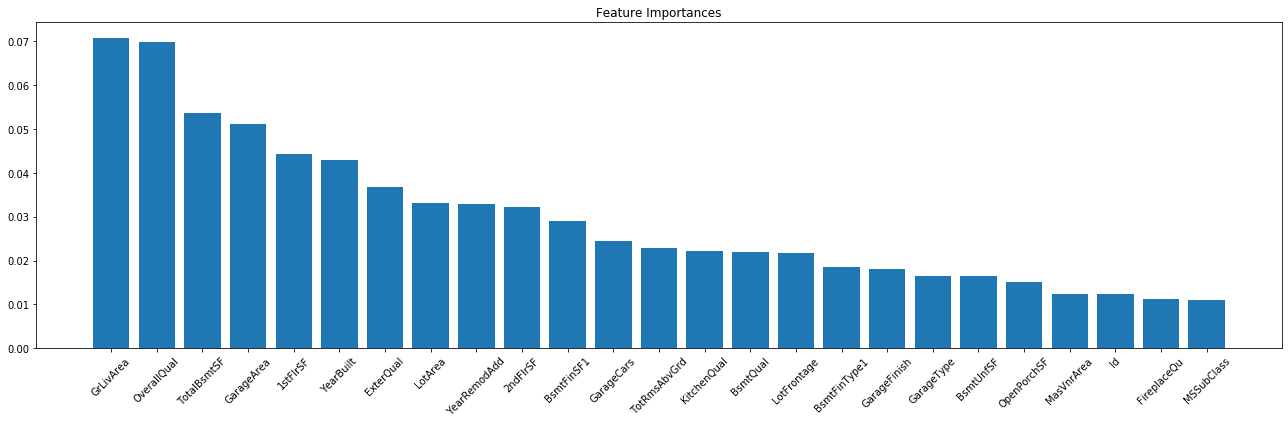

In [23]:
plt.figure(figsize=(18,6))
plt.bar(feature_df.feature[:25], feature_df.importance[:25])
plt.xticks(rotation=45)
plt.title('Feature Importances')
plt.tight_layout();

In [12]:
rf = RandomForestClassifier(**best_params)

In [13]:
max_num_features = 31

In [26]:
train_scores = []
f1_macro = []
accuracy = []
recall = []
precision = []

# Going to run the RFClassification on 
for num_features in range(1,max_num_features):
    features = list(feature_df.iloc[:num_features, 0].values) + ['SalePrice']
    data_partial = data.loc[:, features]
    X_train, X_test, y_train, y_test = get_binned_train_test_split(data_partial)
    rf = RandomForestClassifier(**best_params)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    f1_macro.append(f1_score(y_test, y_pred, average='macro'))
    accuracy.append(accuracy_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred, average='macro'))
    precision.append(precision_score(y_test, y_pred, average='macro'))
    train_scores.append(rf.score(X_train, y_train))

Text(0, 0.5, 'metric score %')

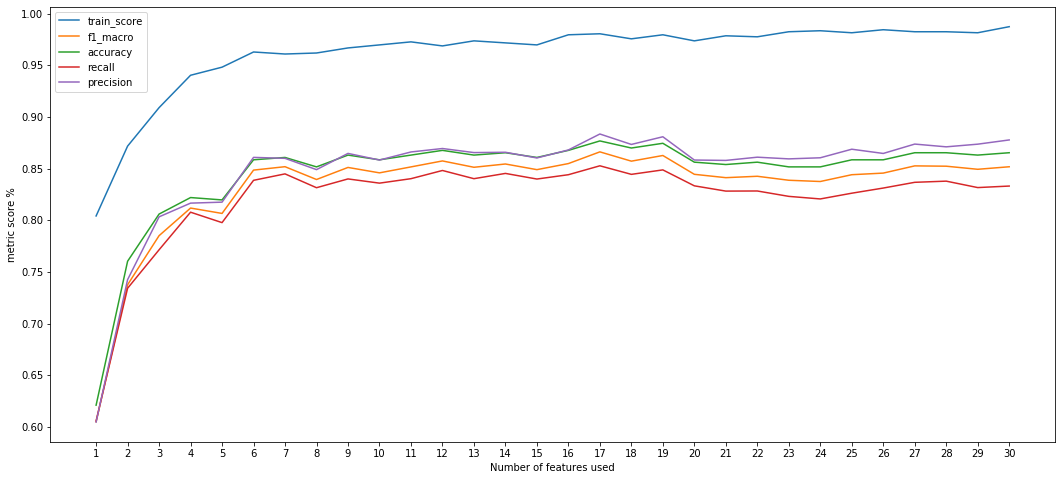

In [27]:
plt.figure(figsize=(18,8))
plt.plot(range(1, max_num_features), train_scores, label='train_score')
plt.plot(range(1, max_num_features), f1_macro, label='f1_macro')
plt.plot(range(1, max_num_features), accuracy, label='accuracy')
plt.plot(range(1, max_num_features), recall, label='recall')
plt.plot(range(1, max_num_features), precision, label='precision')
plt.xticks(range(1, max_num_features))
plt.legend()
plt.xlabel('Number of features used')
plt.ylabel('metric score %')

In [28]:
feature_df.iloc[:6, 0]

0      GrLivArea
1    OverallQual
2    TotalBsmtSF
3     GarageArea
4       1stFlrSF
5      YearBuilt
Name: feature, dtype: object

We see that by using these 6 features we achieve the same accuracy as with any subsequent number of features